# Home Credit Default Risk - Machine Learning Project

## Project Overview
- Predict loan default risk using historical credit data.
- Objectives: Improve financial risk assessment, reduce losses for lenders.

# Processing `application_train.csv` (Main Loan Application Data)

## 1. Load Data (`application_train.csv`)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
# Check available data files
input_path = "/kaggle/input"  # Kaggle dataset directory
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [3]:
# Load dataset 
df_application_train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")

## 2. Initial Data Inspection (`application_train.csv`)

In [4]:
# Check for infinite values
print("🔍 Checking for infinite values in dataset...")
inf_count = (df_application_train == np.inf).sum().sum()
neg_inf_count = (df_application_train == -np.inf).sum().sum()

if inf_count > 0 or neg_inf_count > 0:
    print(f"⚠️ Found {inf_count} positive and {neg_inf_count} negative infinite values!")
else:
    print("✅ No infinite values detected.")

🔍 Checking for infinite values in dataset...
✅ No infinite values detected.


In [5]:
# 🔍 Check for missing values
missing_values = df_application_train.isnull().sum()
missing_values = missing_values[missing_values > 0]  

if not missing_values.empty:
    print("⚠️ Missing values detected in columns:")
    print(missing_values)
else:
    print("✅ No missing values detected.")

⚠️ Missing values detected in columns:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [6]:
df_application_train.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
# Check for extreme values using percentile-based thresholds
print("Checking for extreme values in dataset using percentile thresholds...")

# Exclude ID columns from percentile-based detection
exclude_cols = ['SK_ID_CURR', 'DAYS_ID_PUBLISH']  
numeric_columns = df_application_train.select_dtypes(include=["number"]).drop(columns=exclude_cols, errors='ignore')

# Compute percentile-based thresholds
upper_threshold = numeric_columns.quantile(0.99)
lower_threshold = numeric_columns.quantile(0.01)

# Identify extreme values
extreme_columns = numeric_columns.max() > upper_threshold
small_columns = numeric_columns.min() < lower_threshold

# Print results
if extreme_columns.any():
    print(f"⚠️ Columns with very large values (above 99th percentile):\n{numeric_columns.loc[:, extreme_columns].max()}")
if small_columns.any():
    print(f"⚠️ Columns with very small values (below 1st percentile):\n{numeric_columns.loc[:, small_columns].min()}")
if not extreme_columns.any() and not small_columns.any():
    print("✅ No extreme values detected.")


Checking for extreme values in dataset using percentile thresholds...
⚠️ Columns with very large values (above 99th percentile):
CNT_CHILDREN                         19.0
AMT_INCOME_TOTAL              117000000.0
AMT_CREDIT                      4050000.0
AMT_ANNUITY                      258025.5
AMT_GOODS_PRICE                 4050000.0
                                 ...     
AMT_REQ_CREDIT_BUREAU_DAY             9.0
AMT_REQ_CREDIT_BUREAU_WEEK            8.0
AMT_REQ_CREDIT_BUREAU_MON            27.0
AMT_REQ_CREDIT_BUREAU_QRT           261.0
AMT_REQ_CREDIT_BUREAU_YEAR           25.0
Length: 82, dtype: float64
⚠️ Columns with very small values (below 1st percentile):
AMT_INCOME_TOTAL                2.565000e+04
AMT_CREDIT                      4.500000e+04
AMT_ANNUITY                     1.615500e+03
AMT_GOODS_PRICE                 4.050000e+04
REGION_POPULATION_RELATIVE      2.900000e-04
DAYS_BIRTH                     -2.522900e+04
DAYS_EMPLOYED                  -1.791200e+04
DAYS_REGI

In [8]:
# Check the shape of the dataset
print("DataFrame Shape:", df_application_train.shape)

DataFrame Shape: (307511, 122)


In [9]:
print("First few rows of the DataFrame:")
display(df_application_train.head())

First few rows of the DataFrame:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Get a concise summary of the DataFrame
print("DataFrame Info:")
df_application_train.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
# Get summary statistics of numeric columns
print("Descriptive Statistics:")
display(df_application_train.describe())
display(df_application_train.describe(include="object"))

Descriptive Statistics:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


## 3. Initial Data Cleaning (`application_train.csv`)

In [12]:
# Replace infinite values with NaN before handling missing values
df_application_train.replace([np.inf, -np.inf], np.nan, inplace=True)
print("✅ Infinite values replaced with NaN.")

✅ Infinite values replaced with NaN.


In [13]:
# Step 1: Detect categorical columns stored as 'object' (text-based categories)
categorical_columns = df_application_train.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Step 2: Detect numeric columns with low unique values that should be categorical
low_unique_cols = df_application_train.nunique()
additional_categorical = low_unique_cols[low_unique_cols < 20].index.tolist()

In [15]:
# Step 3: Merge both lists (ensuring only relevant categorical columns)
final_categorical_columns = list(set(categorical_columns + additional_categorical))

print("✅ Detected categorical columns:", final_categorical_columns)

✅ Detected categorical columns: ['NAME_CONTRACT_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_7', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_18', 'EMERGENCYSTATE_MODE', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_8', 'REG_REGION_NOT_WORK_REGION', 'CODE_GENDER', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_12', 'NAME_EDUCATION_TYPE', 'HOUSETYPE_MODE', 'FLAG_CONT_MOBILE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_OWN_REALTY', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'NAME_FAMILY_STATUS', 'FLAG_PHONE', 'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_17', 'ORGANIZATION_TYPE', 'FLAG_MOBIL', 'FLAG_DOCUMENT_19', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_15', 'FLAG_OWN_CAR', 'TARGET', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_4', 'AMT_REQ_CREDIT_BUREAU_QRT', 'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_6', 'NAME_HOUSING_TYPE', 'FLAG_DOCUMENT_9', 

In [16]:
# Validation Step 1: Validate detected categorical columns by checking unique values
# Ensures that high-cardinality numeric features are not mistakenly categorized as categorical
categorical_unique_counts = df_application_train[final_categorical_columns].nunique().sort_values(ascending=False)
print("Unique counts of detected categorical columns:\n", categorical_unique_counts)

Unique counts of detected categorical columns:
 ORGANIZATION_TYPE              58
OCCUPATION_TYPE                18
CNT_FAM_MEMBERS                17
CNT_CHILDREN                   15
AMT_REQ_CREDIT_BUREAU_QRT      11
DEF_30_CNT_SOCIAL_CIRCLE       10
DEF_60_CNT_SOCIAL_CIRCLE        9
AMT_REQ_CREDIT_BUREAU_WEEK      9
AMT_REQ_CREDIT_BUREAU_DAY       9
NAME_INCOME_TYPE                8
WEEKDAY_APPR_PROCESS_START      7
WALLSMATERIAL_MODE              7
NAME_TYPE_SUITE                 7
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
AMT_REQ_CREDIT_BUREAU_HOUR      5
NAME_EDUCATION_TYPE             5
FONDKAPREMONT_MODE              4
HOUSETYPE_MODE                  3
CODE_GENDER                     3
REGION_RATING_CLIENT_W_CITY     3
REGION_RATING_CLIENT            3
FLAG_DOCUMENT_6                 2
FLAG_DOCUMENT_9                 2
FLAG_EMAIL                      2
NAME_CONTRACT_TYPE              2
LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_20                2


In [17]:
# Validation Step 2: Cross-check original data types to ensure numeric features remain numeric
original_dtypes = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv").dtypes
numeric_features_recheck = [col for col in final_categorical_columns if original_dtypes[col] in ['int64', 'float64']]

print("Columns confirmed as numeric after rechecking original dataset:", numeric_features_recheck)

Columns confirmed as numeric after rechecking original dataset: ['DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_7', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_18', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_8', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_12', 'FLAG_CONT_MOBILE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_PHONE', 'FLAG_DOCUMENT_17', 'FLAG_MOBIL', 'FLAG_DOCUMENT_19', 'REG_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_15', 'TARGET', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_13', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_4', 'AMT_REQ_CREDIT_BUREAU_QRT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_20', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_11', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_16']


In [18]:
# Final confirmed categorical columns
final_categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'
]

In [19]:
# Final confirmed numeric columns (validated)
corrected_numeric_columns = [
    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_12', 'FLAG_EMAIL', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_11', 
    'FLAG_DOCUMENT_8', 'FLAG_MOBIL', 'TARGET', 'REG_REGION_NOT_WORK_REGION', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_16', 
    'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_18', 'CNT_CHILDREN', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_15', 'REG_CITY_NOT_LIVE_CITY', 'REG_REGION_NOT_LIVE_REGION', 
    'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_19', 
    'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_17', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_WORK_PHONE', 
    'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_PHONE', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 'LIVE_CITY_NOT_WORK_CITY'
]

In [20]:
# Convert confirmed categorical columns to 'category' type
for col in final_categorical_columns:
    df_application_train[col] = df_application_train[col].astype('category')

In [21]:
# Convert confirmed numeric columns back to numeric
for col in corrected_numeric_columns:
    df_application_train[col] = pd.to_numeric(df_application_train[col], errors='coerce')

In [22]:
print("Final categorical columns:", df_application_train.select_dtypes(include=['category']).columns.tolist())

Final categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [23]:
print("Final numeric columns:", df_application_train.select_dtypes(include=['int64', 'float64']).columns.tolist())

Final numeric columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE'

In [24]:
# Display all columns and their data types
pd.set_option('display.max_rows', None) 
print("✅ Updated Data Types:")
print(df_application_train.dtypes)
pd.reset_option('display.max_rows')  

✅ Updated Data Types:
SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
OWN_CAR_AGE                      float64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     

### Missing Values Handling

In [25]:
# Check for missing values
pd.set_option('display.max_rows', None) 
print("Missing values in each column:")
print(df_application_train.isnull().sum())
pd.reset_option('display.max_rows')  

Missing values in each column:
SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                  

In [26]:
# Define missing value thresholds
low_threshold = 0.01  # Less than 1% missing
moderate_threshold = 0.2  # Between 1% and 20% missing
high_threshold = 0.5  # More than 50% missing (consider dropping)

# Calculate missing value percentage
missing_percent = df_application_train.isnull().sum() / len(df_application_train)

# Display missing percentages
print("🔍 Missing Value Percentages:")
display(missing_percent[missing_percent > 0].sort_values(ascending=False))

🔍 Missing Value Percentages:


COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_ANNUITY                 0.000039
CNT_FAM_MEMBERS             0.000007
DAYS_LAST_PHONE_CHANGE      0.000003
Length: 67, dtype: float64

In [27]:
# Identify columns to drop
columns_to_drop = missing_percent[missing_percent > high_threshold].index

# Drop columns
df_application_train.drop(columns=columns_to_drop, inplace=True)

print(f"✅ Dropped {len(columns_to_drop)} columns with more than 50% missing values.")

✅ Dropped 41 columns with more than 50% missing values.


In [28]:
# Fill numeric columns with median
numeric_cols = df_application_train.select_dtypes(include=['int64', 'float64']).columns
df_application_train[numeric_cols] = df_application_train[numeric_cols].fillna(df_application_train[numeric_cols].median())

print("✅ Filled numeric missing values with median.")

✅ Filled numeric missing values with median.


In [29]:
# Fill categorical columns with mode
categorical_cols = df_application_train.select_dtypes(include=['category']).columns
for col in categorical_cols:
    df_application_train[col] = df_application_train[col].fillna(df_application_train[col].mode()[0]) 

print("✅ Filled categorical missing values with mode (Fixed Version).")

✅ Filled categorical missing values with mode (Fixed Version).


In [30]:
print("🔍 Final Missing Values Check:")
print(df_application_train.isnull().sum().sum())

🔍 Final Missing Values Check:
0


In [31]:
# Check for duplicates
print("Number of duplicate rows:", df_application_train.duplicated().sum())

Number of duplicate rows: 0


## 4. Exploratory Data Analysis (`application_train.csv`)

In [32]:
### Summary Statistics
pd.set_option('display.max_columns', None)
# Numeric summary
print("📊 Summary Statistics (Numeric Features):")
display(df_application_train.describe().T)

# Categorical summary
print("\n📊 Summary Statistics (Categorical Features):")
display(df_application_train.describe(include=["category"]).T)
pd.reset_option('display.max_columns') 

📊 Summary Statistics (Numeric Features):


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,307511.0,0.006055,0.103037,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,307511.0,0.029723,0.190728,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,307511.0,0.231293,0.856810,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,307511.0,0.229631,0.744059,0.0,0.0,0.0,0.0,261.0



📊 Summary Statistics (Categorical Features):


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,307511,7,Unaccompanied,249818
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,18,Laborers,151577


### 4.1 Checking for Class Imbalance (`application_train.csv`)

In [33]:
print("Class distribution:")
print(df_application_train['TARGET'].value_counts(normalize=True) * 100)

Class distribution:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


### 4.2 Correlation Analysis (`application_train.csv`)

In [34]:
# Select only the numeric columns from the DataFrame
numeric_data = df_application_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric data only
corr_matrix = numeric_data.corr()

# Show top 10 most correlated features with TARGET
target_corr = corr_matrix["TARGET"].abs().sort_values(ascending=False)
print(target_corr.head(10))

TARGET                    1.000000
EXT_SOURCE_2              0.160295
EXT_SOURCE_3              0.155892
DAYS_BIRTH                0.078239
DAYS_LAST_PHONE_CHANGE    0.055218
DAYS_ID_PUBLISH           0.051457
REG_CITY_NOT_WORK_CITY    0.050994
FLAG_EMP_PHONE            0.045982
DAYS_EMPLOYED             0.044932
REG_CITY_NOT_LIVE_CITY    0.044395
Name: TARGET, dtype: float64


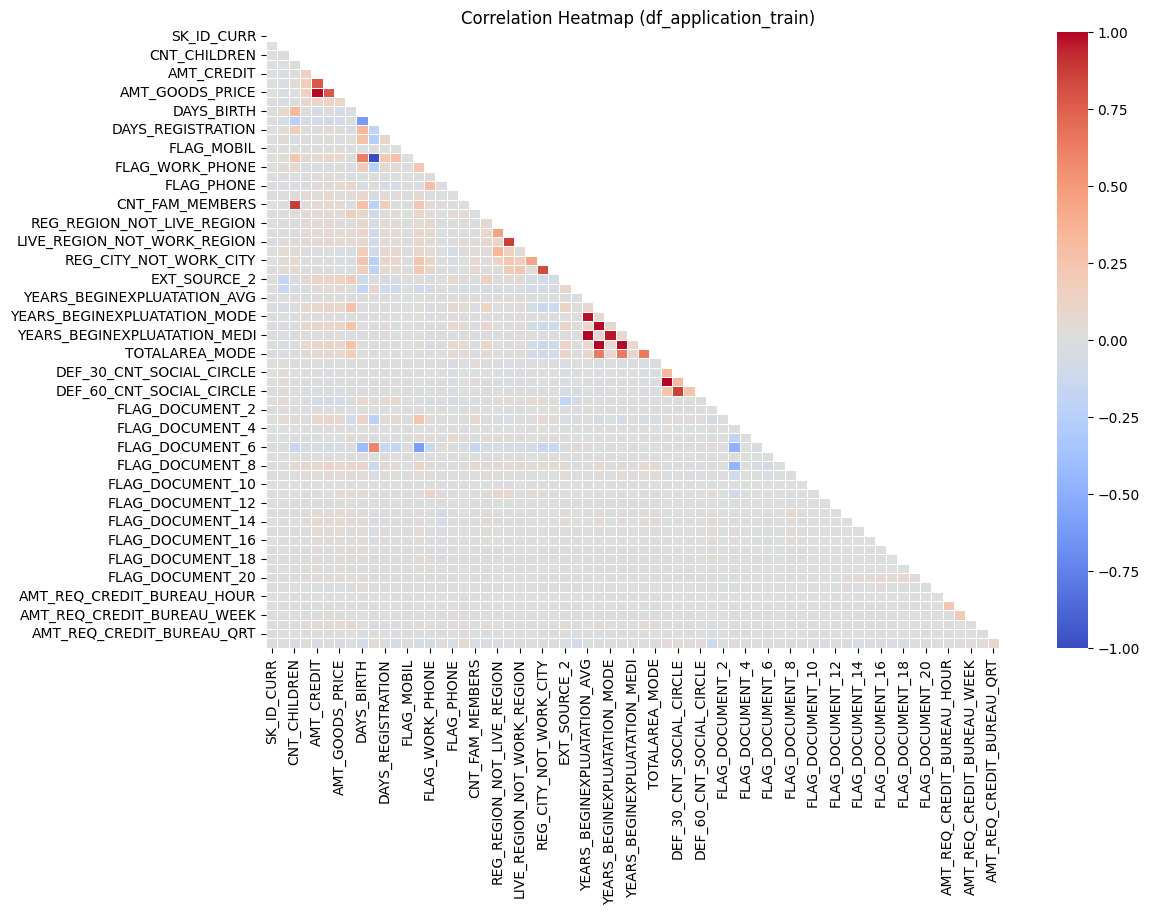

In [35]:
# Visualize the correlation matrix using a heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=False,  
    cmap="coolwarm", 
    linewidths=0.5, 
    vmin=-1, vmax=1  
)

# Title
plt.title("Correlation Heatmap (df_application_train)")
plt.show()


### 4.3 Visualising Outliers (`application_train.csv`)

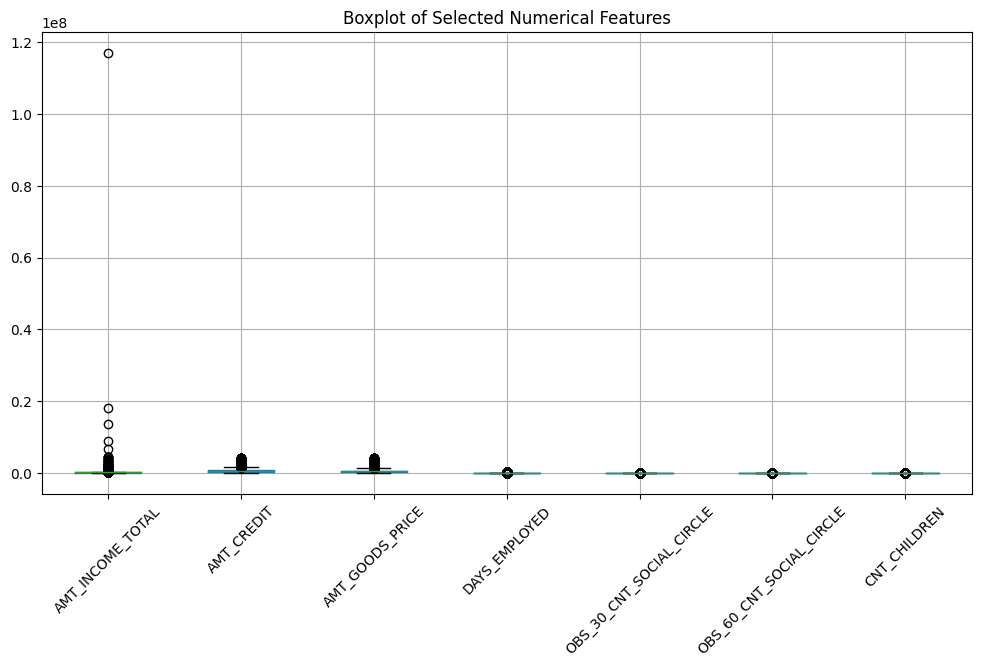

In [36]:
# Selected key numeric features for outlier detection
outlier_columns = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
    'DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN'
]

plt.figure(figsize=(12, 6))
df_application_train[outlier_columns].boxplot()
plt.title('Boxplot of Selected Numerical Features')
plt.xticks(rotation=45)  
plt.show()


### 4.4 Pair Plot Analysis (`application_train.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

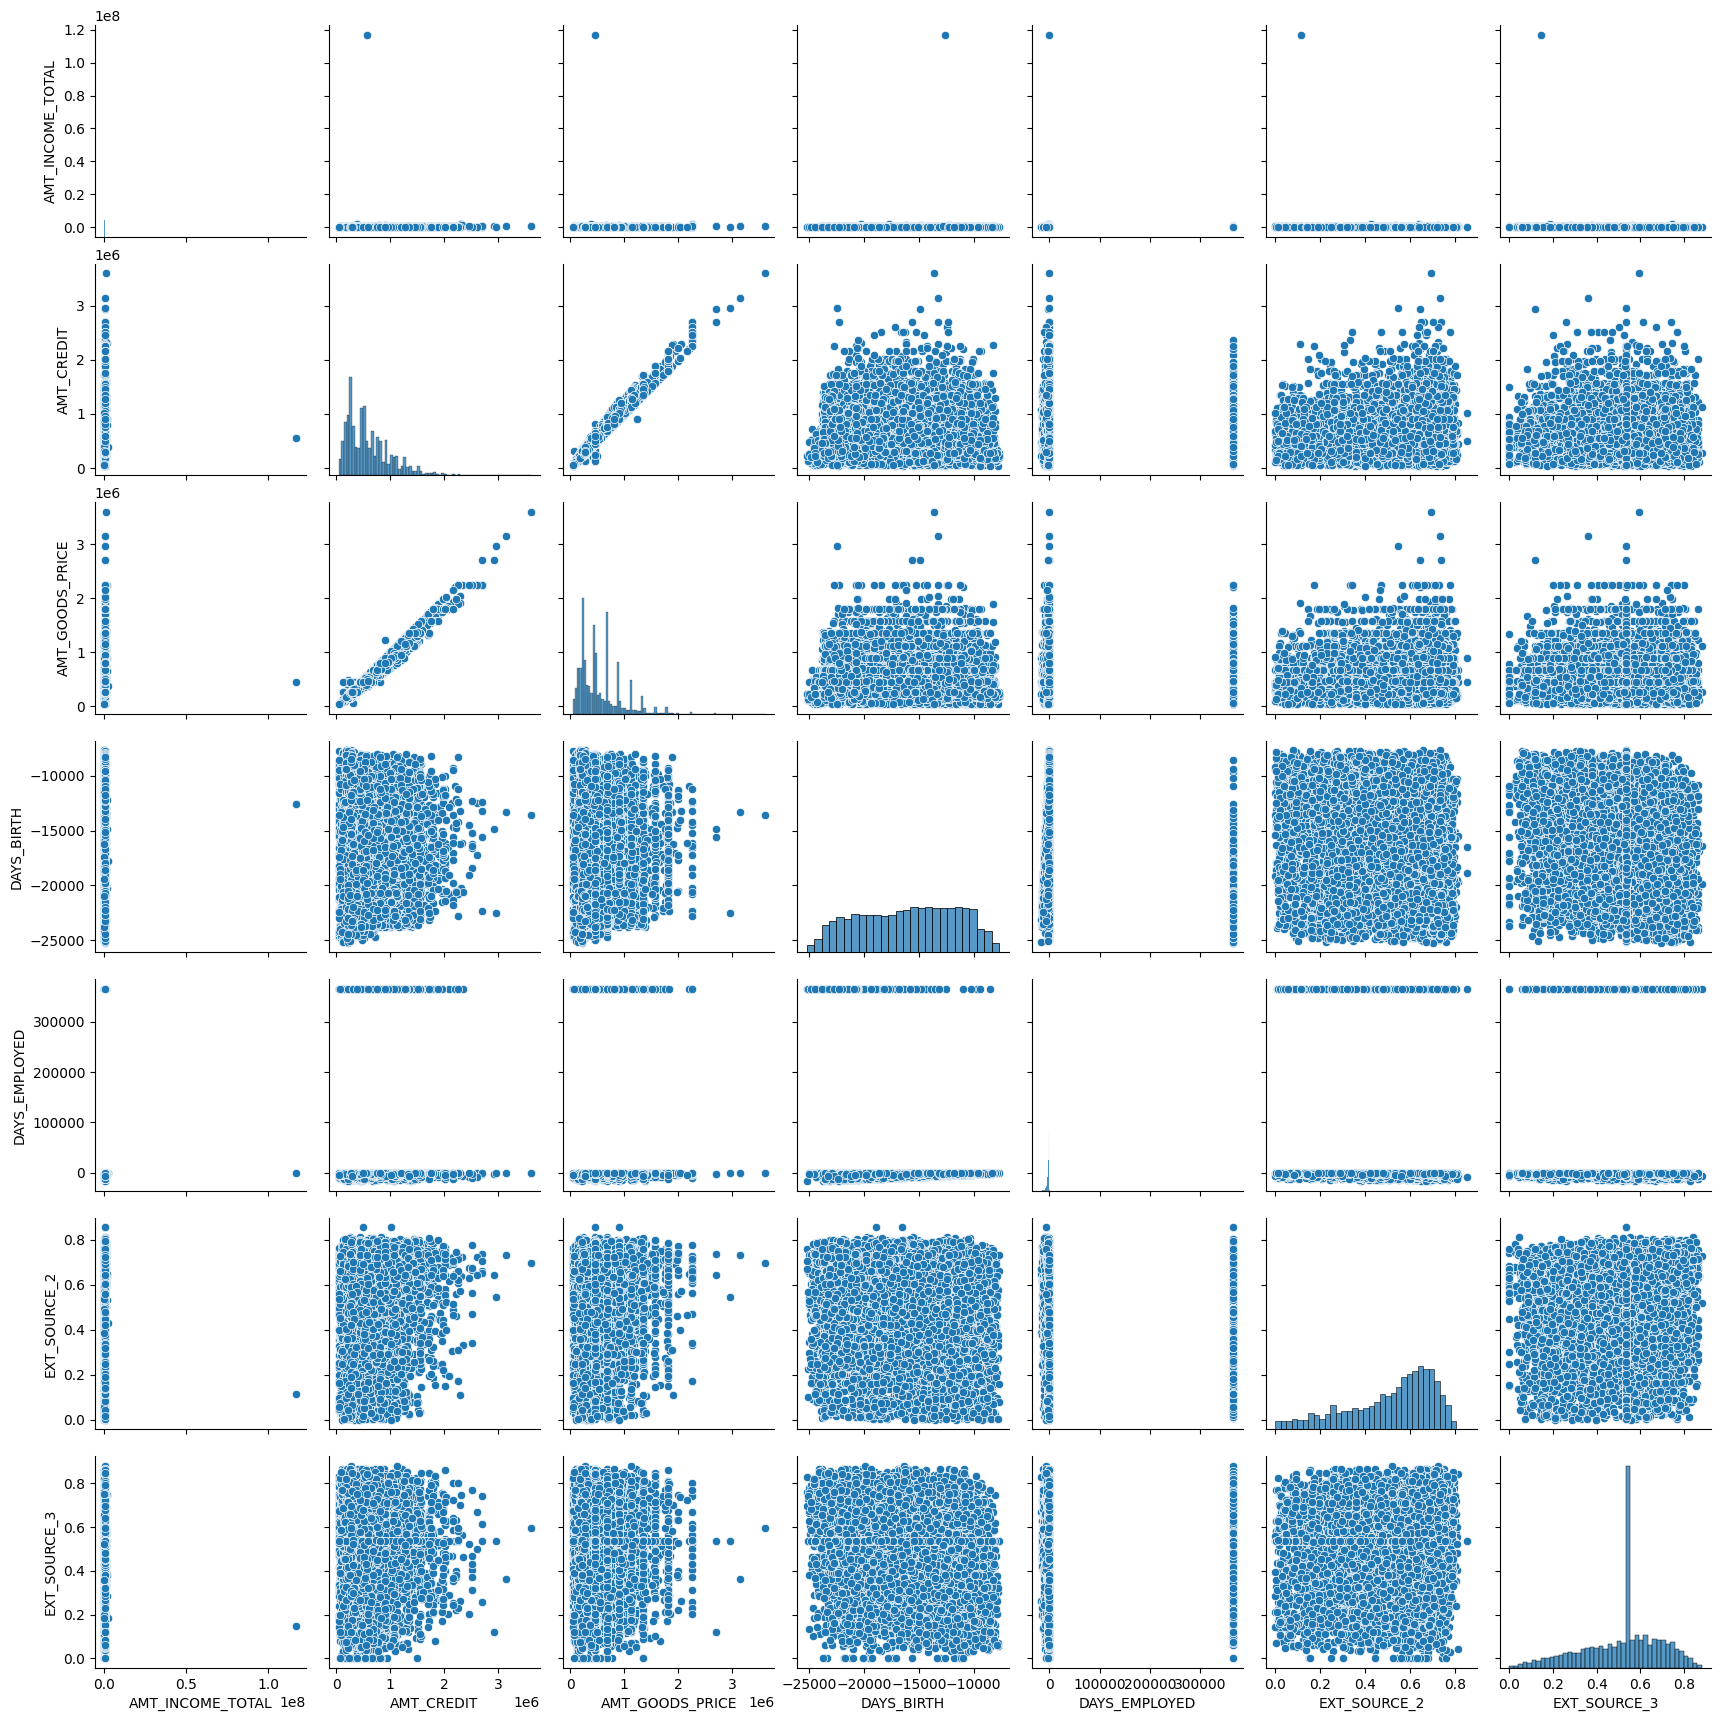

In [37]:
selected_numeric_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# Reduce dataset to 10,000 rows for performance
df_sample = df_application_train[selected_numeric_features].sample(n=10000, random_state=42)

sns.pairplot(df_sample)
plt.show()

### 4.5 Group-wise Analysis (`application_train.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


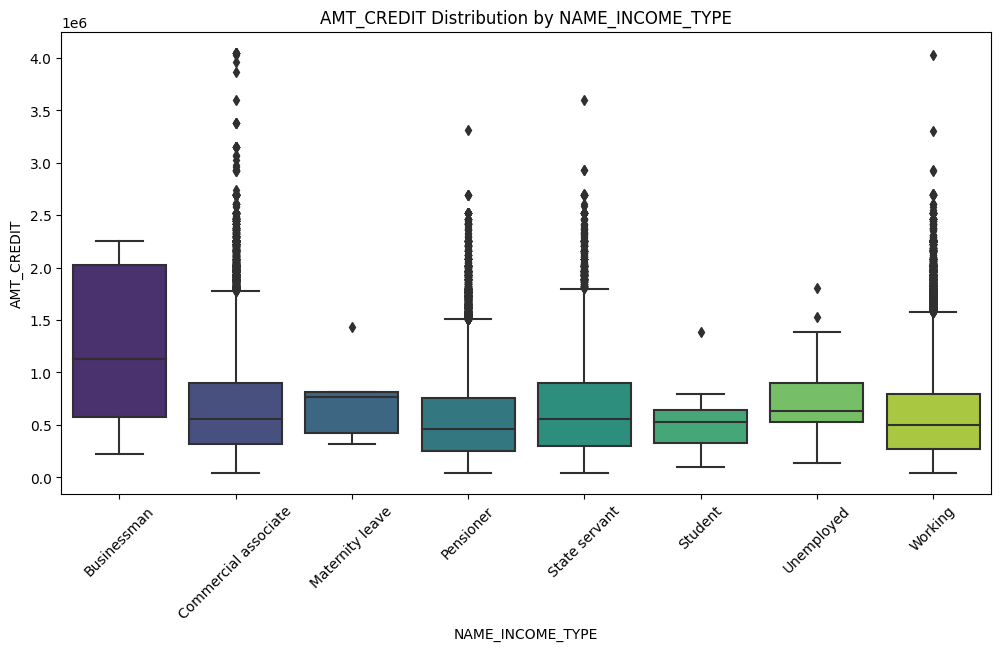

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


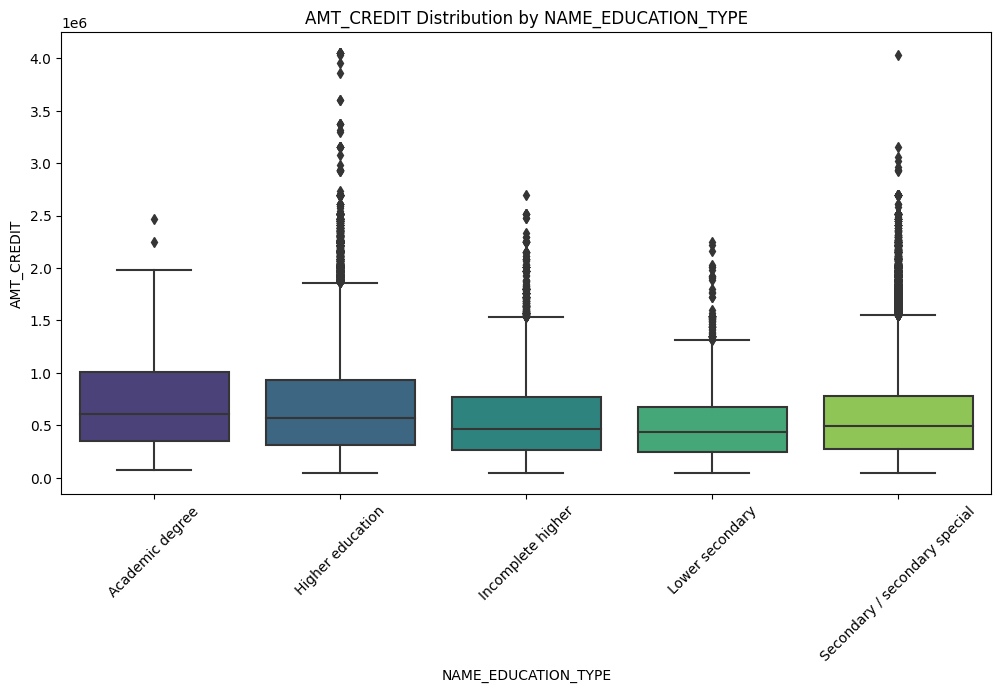

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


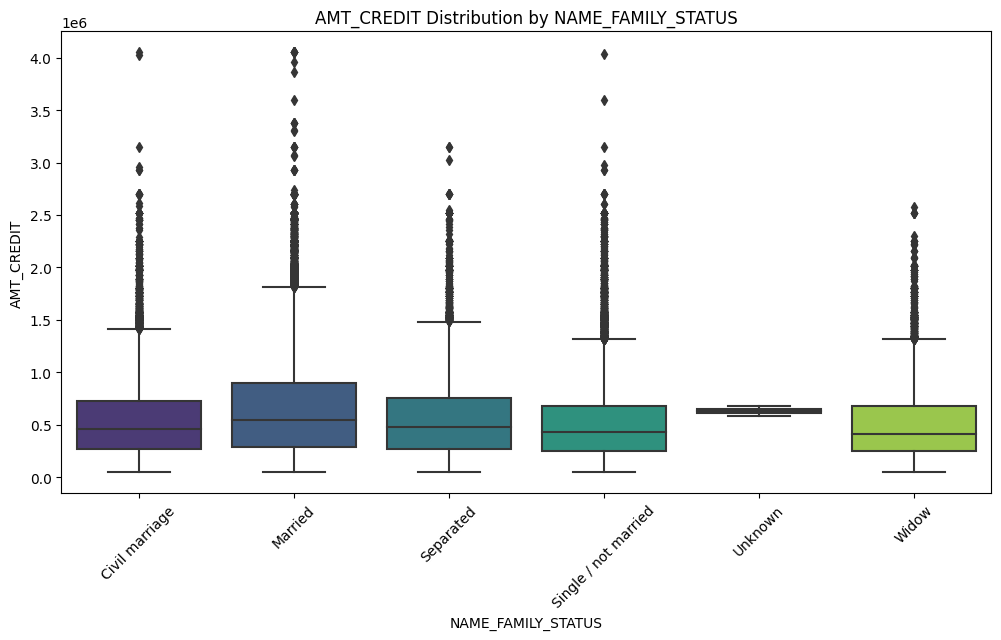

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


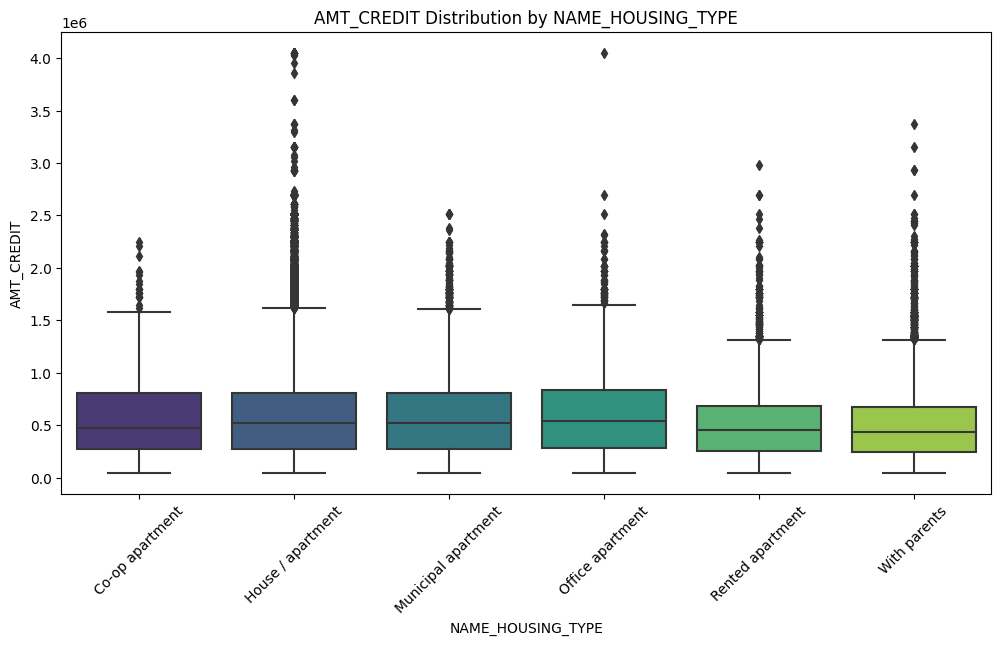

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


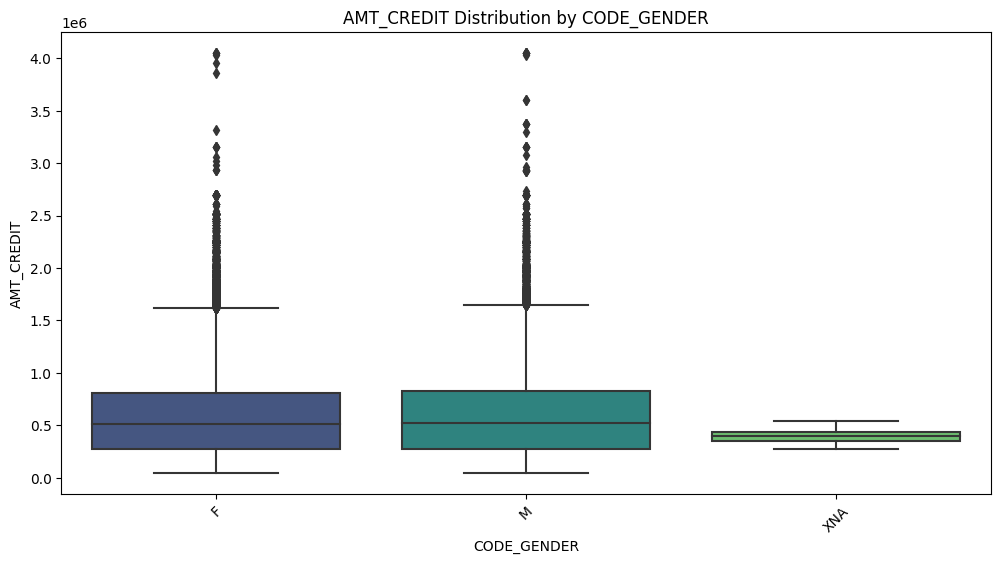

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


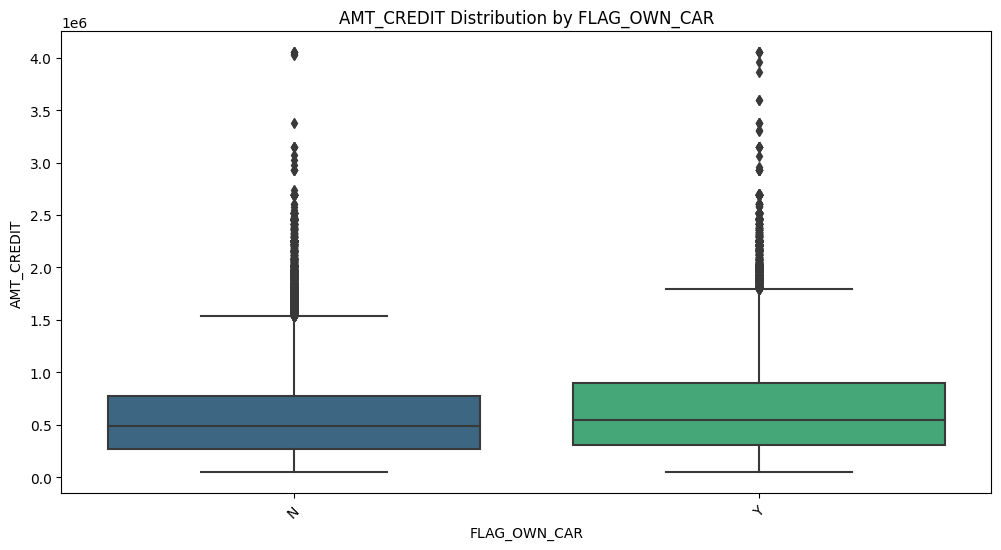

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


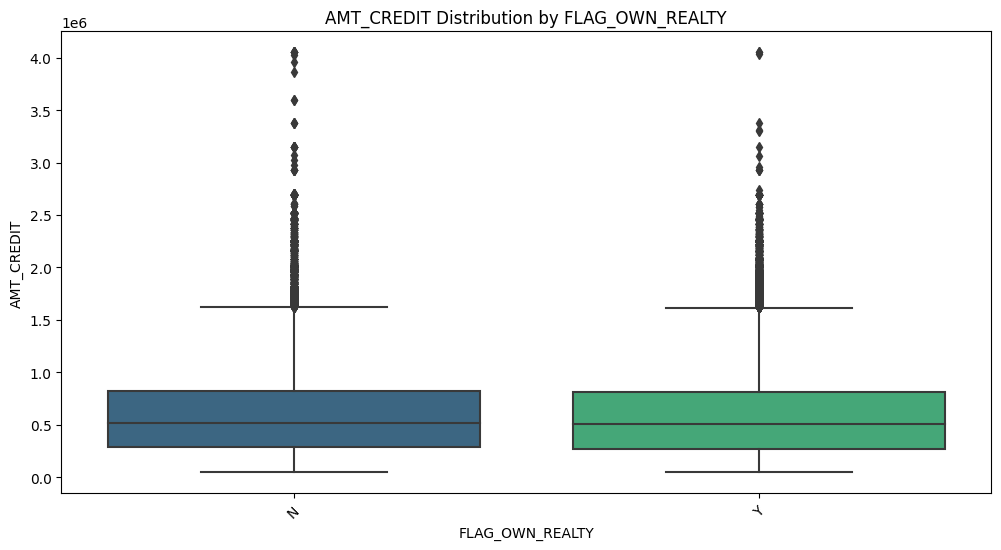

In [38]:
# Selected categorical columns for group-wise analysis
categorical_columns = [
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
    'NAME_HOUSING_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
]

# Selected numerical column (loan amount)
numeric_column = 'AMT_CREDIT' 

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y=numeric_column, data=df_application_train, palette='viridis', dodge=False)
    plt.title(f'{numeric_column} Distribution by {column}')
    plt.xticks(rotation=45)
    plt.show()

### 4.6 Joint Plot Analysis (`application_train.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


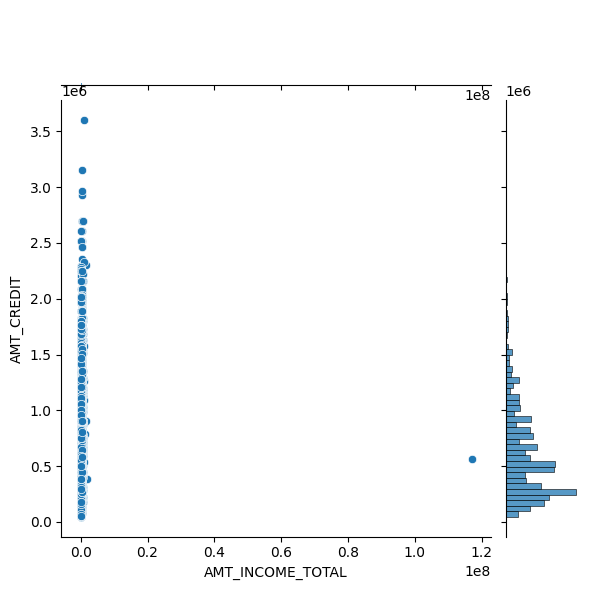

In [39]:
# Sample 10,000 rows to improve performance
df_sample = df_application_train.sample(n=10000, random_state=42)

# Scatter plot of Income vs Credit Amount
sns.jointplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df_sample, kind='scatter')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


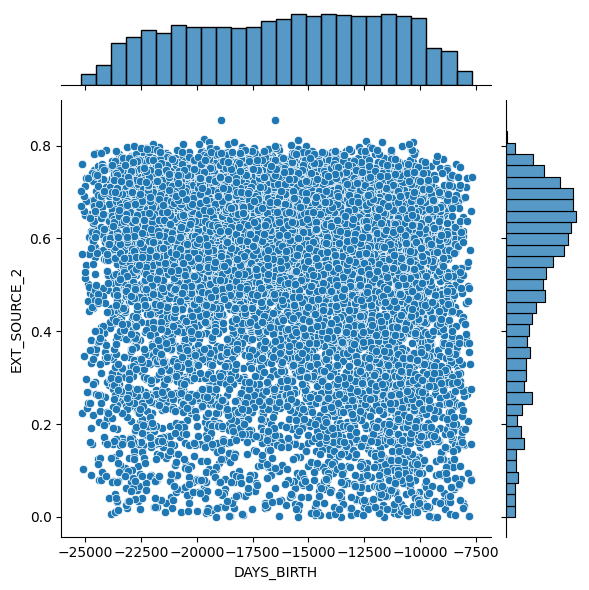

In [40]:
sns.jointplot(x='DAYS_BIRTH', y='EXT_SOURCE_2', data=df_sample, kind='scatter')
plt.show()

### 4.7 Additional EDA Visualisations (`application_train.csv`)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


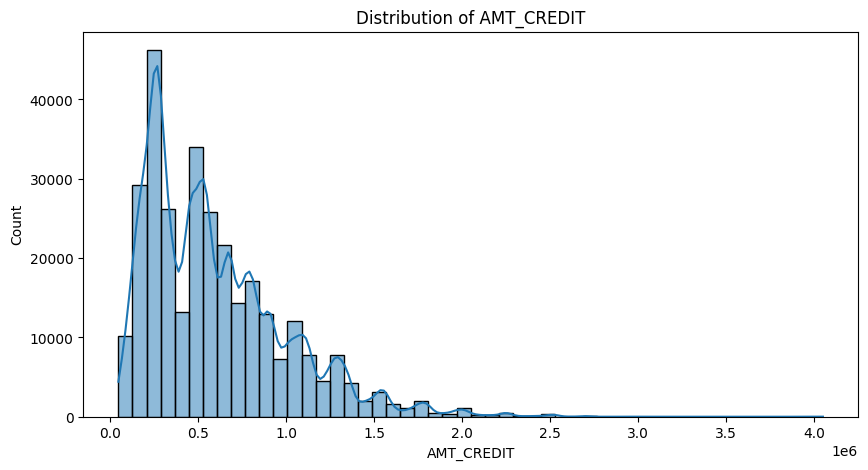

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


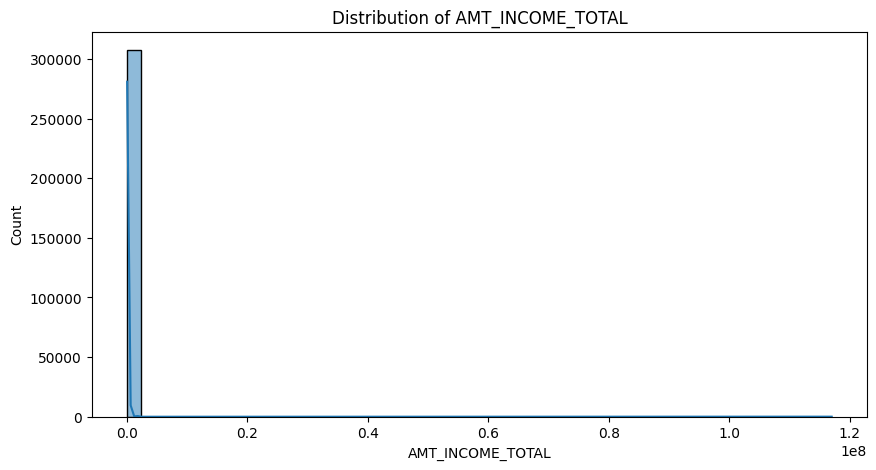

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


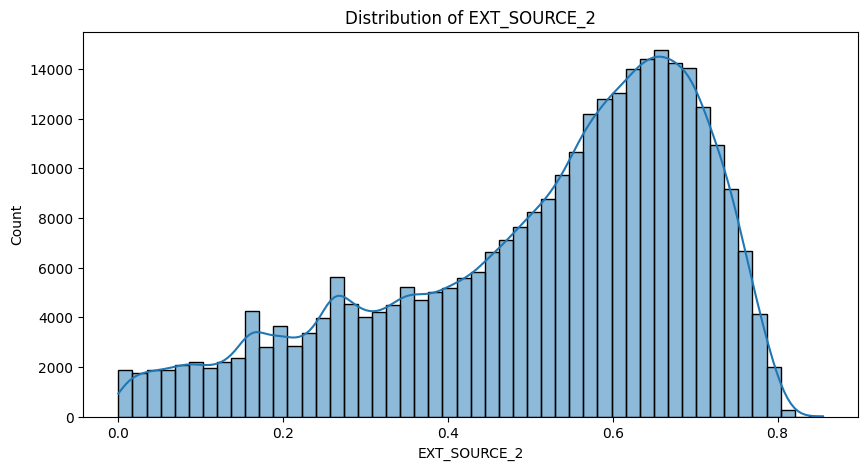

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


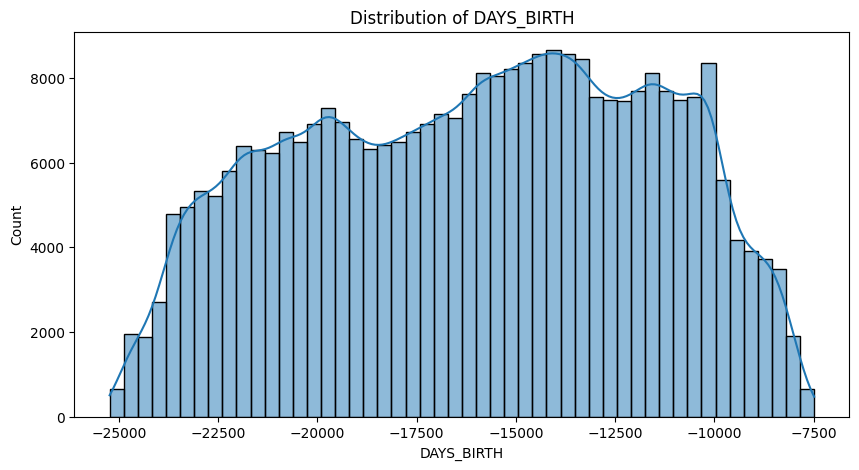

In [41]:
# List of key numerical features to check distributions
features_to_plot = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2', 'DAYS_BIRTH']

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_application_train[feature], bins=50, kde=True) 
    plt.title(f'Distribution of {feature}')
    plt.show()

## 5. Save Processed Dataset (`application_train.csv`)

In [42]:
df_application_train.to_csv("application_train_processed.csv", index=False)
df_application_train.to_pickle("application_train_processed.pkl")

print("✅ Application train dataset saved successfully!")

✅ Application train dataset saved successfully!
